# 1. Read Files

In [1]:
import pandas as pd


df_ha = pd.read_json('../final_data/HA_ALL_nonllm.json', lines=True)
df_iclr = pd.read_json('../final_data/iclr2024_ALL_nonllm.json')
df_neurips = pd.read_json('../final_data/neurips2023_ALL_nonllm.json')

In [2]:
df_ha.shape, df_iclr.shape, df_neurips.shape

((661, 45), (28028, 34), (15175, 34))

In [ ]:
df_ha = df_ha.drop(columns=['llm_overall_score_100'])
df_iclr = df_iclr.drop(columns=['llm_overall_score_100'])
df_neurips = df_neurips.drop(columns=['llm_overall_score_100'])

# 2. Correlations

## All Features

In [3]:
#drop review_creation_to_review_submission_days
# df_ha = df_ha.drop(columns=['review_creation_to_review_submission_days'])
df_iclr = df_iclr.drop(columns=['review_creation_to_review_submission_days'])
df_neurips = df_neurips.drop(columns=['review_creation_to_review_submission_days'])

In [4]:
#rename paper_submission_to_review_creation_days to submission_to_revision_days
# df_ha = df_ha.rename(columns={'paper_submission_to_review_creation_days': 'submission_to_revision_days'})
df_iclr = df_iclr.rename(columns={'paper_submission_to_review_submission_days': 'submission_to_revision_days'})
df_neurips = df_neurips.rename(columns={'paper_submission_to_review_submission_days': 'submission_to_revision_days'})

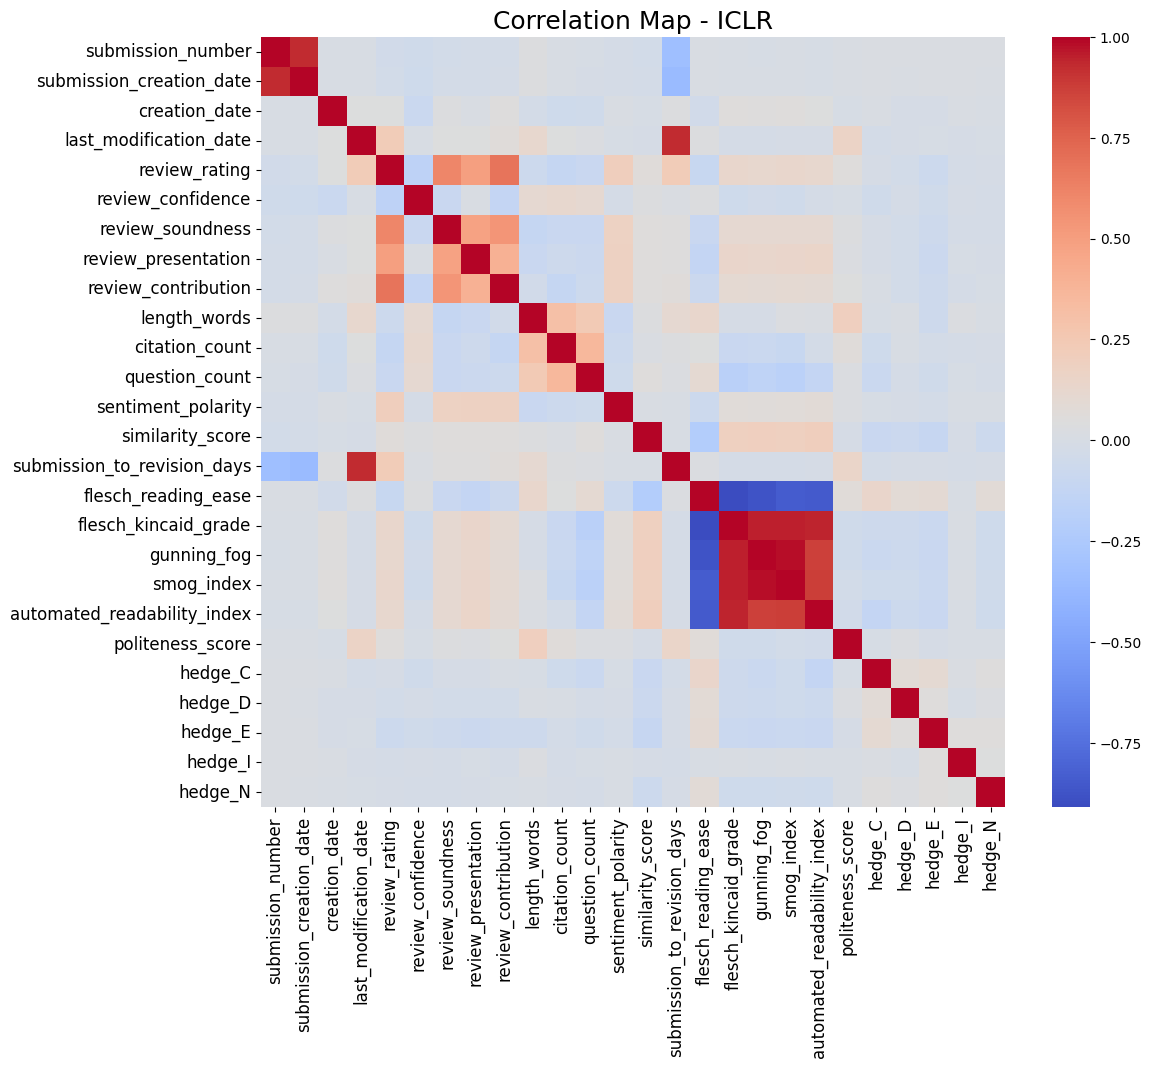

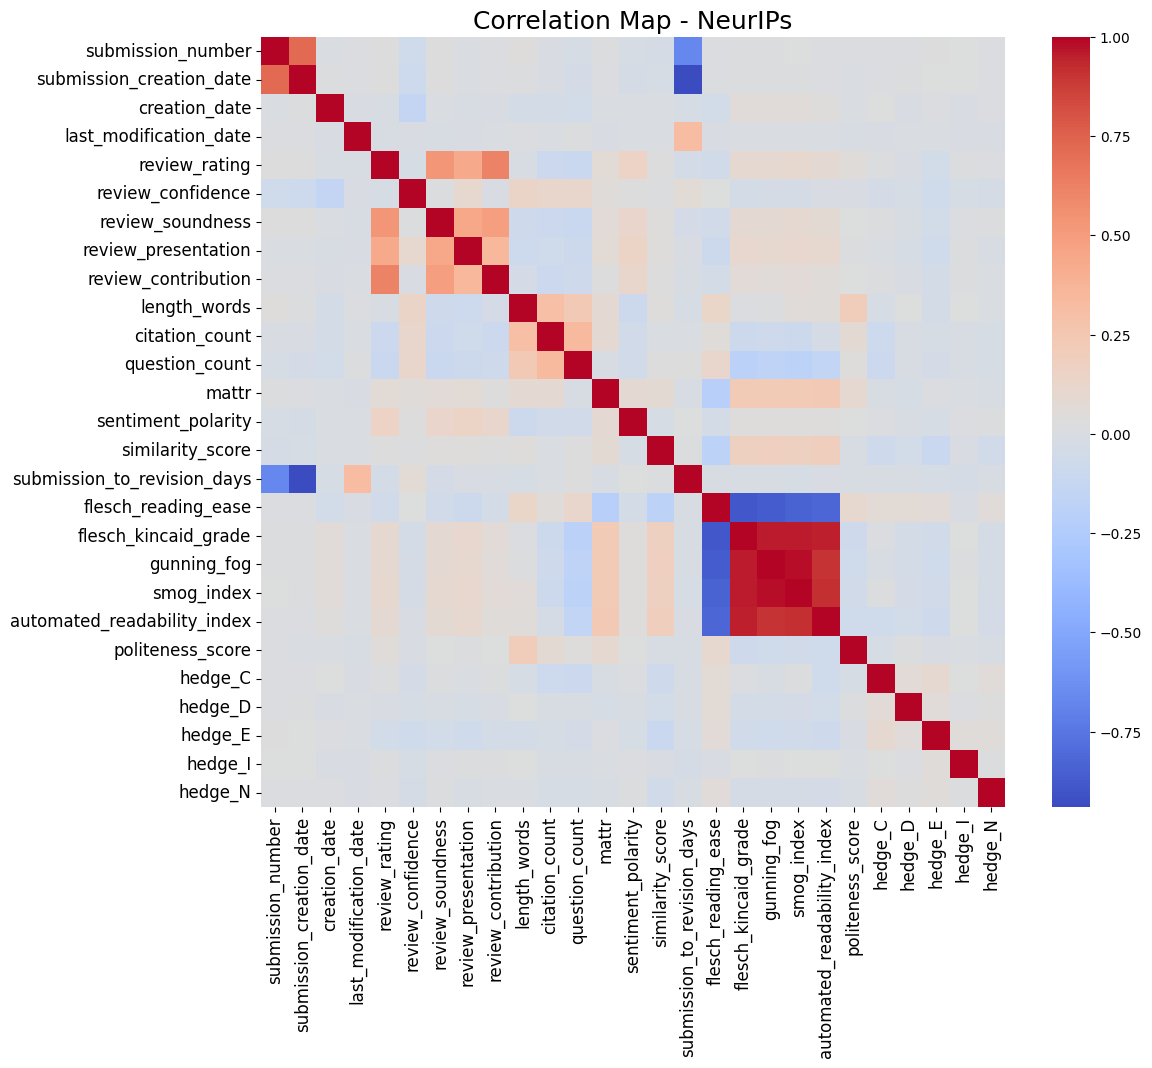

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

# Function to plot correlation map
def plot_correlation_map(df, title):
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numerical_columns.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Plot correlation maps for each dataframe
# plot_correlation_map(df_ha, 'Correlation Map for df_ha')
plot_correlation_map(df_iclr, 'Correlation Map - ICLR')
plot_correlation_map(df_neurips, 'Correlation Map - NeurIPs')

## LLM-based Features

In [ ]:
df_iclr = pd.read_json('../final_data/iclr2024_1000_llama.json')
df_neurips = pd.read_json('../final_data/neurips2023_1000_llama.json')

/home/ali/Review_Quality_Benchmark/.venv/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/ali/Review_Quality_Benchmark/.venv/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


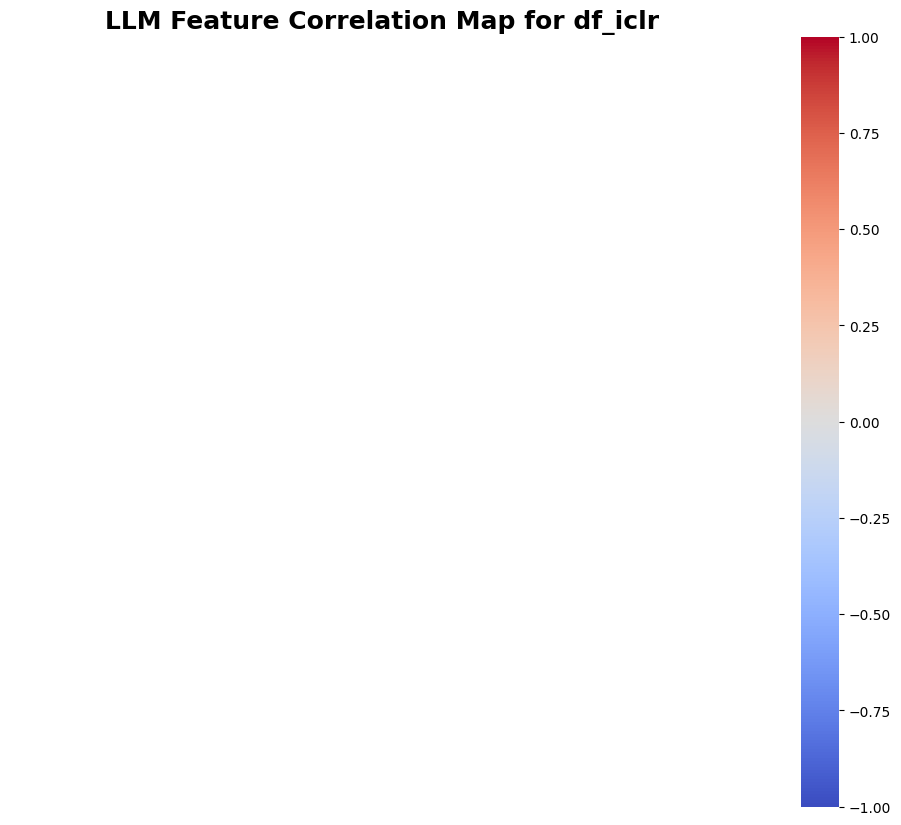

/home/ali/Review_Quality_Benchmark/.venv/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/ali/Review_Quality_Benchmark/.venv/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


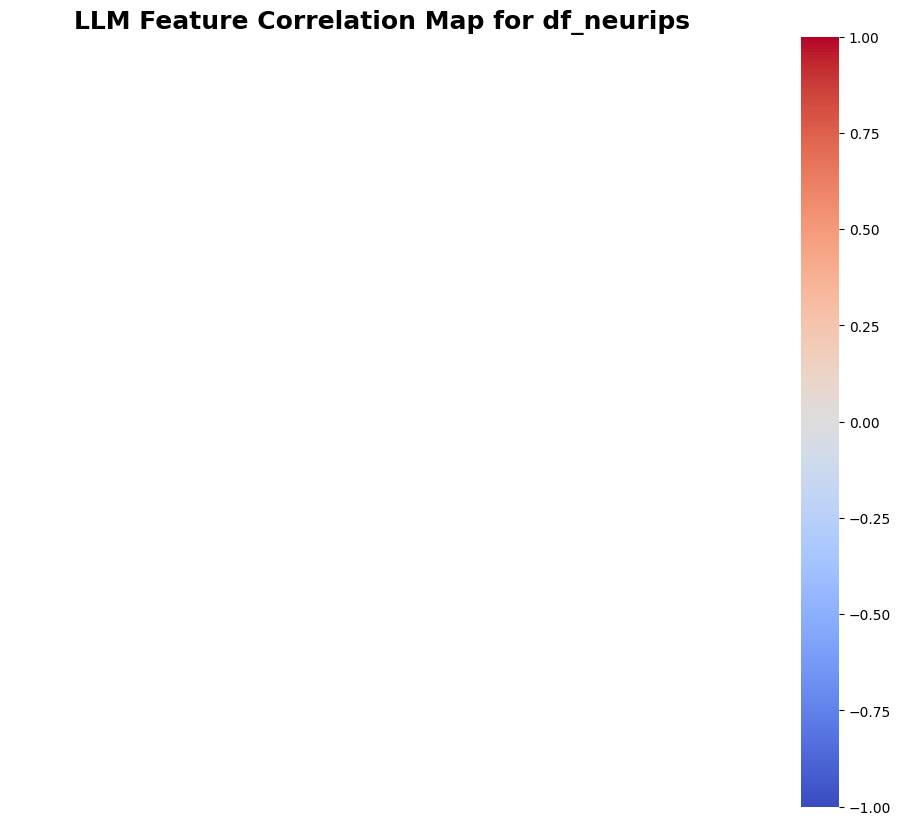

In [9]:
# Function to plot LLM-based feature correlations with improved readability
def plot_llm_feature_correlation(df, title):
    llm_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col.startswith('llm_')]
    llm_correlation_matrix = df[llm_columns].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(llm_correlation_matrix, annot=False, cmap='coolwarm', cbar=True, vmin=-1, vmax=1,
                linewidths=0.5, linecolor='black', annot_kws={"size": 12})
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.show()

# Plot LLM-based feature correlations for each dataframe
# plot_llm_feature_correlation(df_ha, 'LLM Feature Correlation Map for df_ha')
plot_llm_feature_correlation(df_iclr, 'LLM Feature Correlation Map for df_iclr')
plot_llm_feature_correlation(df_neurips, 'LLM Feature Correlation Map for df_neurips')

# 3. Descriptive Statistics

Descriptive Statistics for Review-Related Features (ICLR):
       review_rating  review_confidence  review_soundness  \
count       28028.00           28028.00          28028.00   
mean            5.15               3.64              2.61   
std             1.72               0.81              0.70   
min             1.00               1.00              1.00   
25%             3.00               3.00              2.00   
50%             5.00               4.00              3.00   
75%             6.00               4.00              3.00   
max            10.00               5.00              4.00   

       review_presentation  review_contribution  
count             28028.00             28028.00  
mean                  2.64                 2.38  
std                   0.75                 0.70  
min                   1.00                 1.00  
25%                   2.00                 2.00  
50%                   3.00                 2.00  
75%                   3.00               

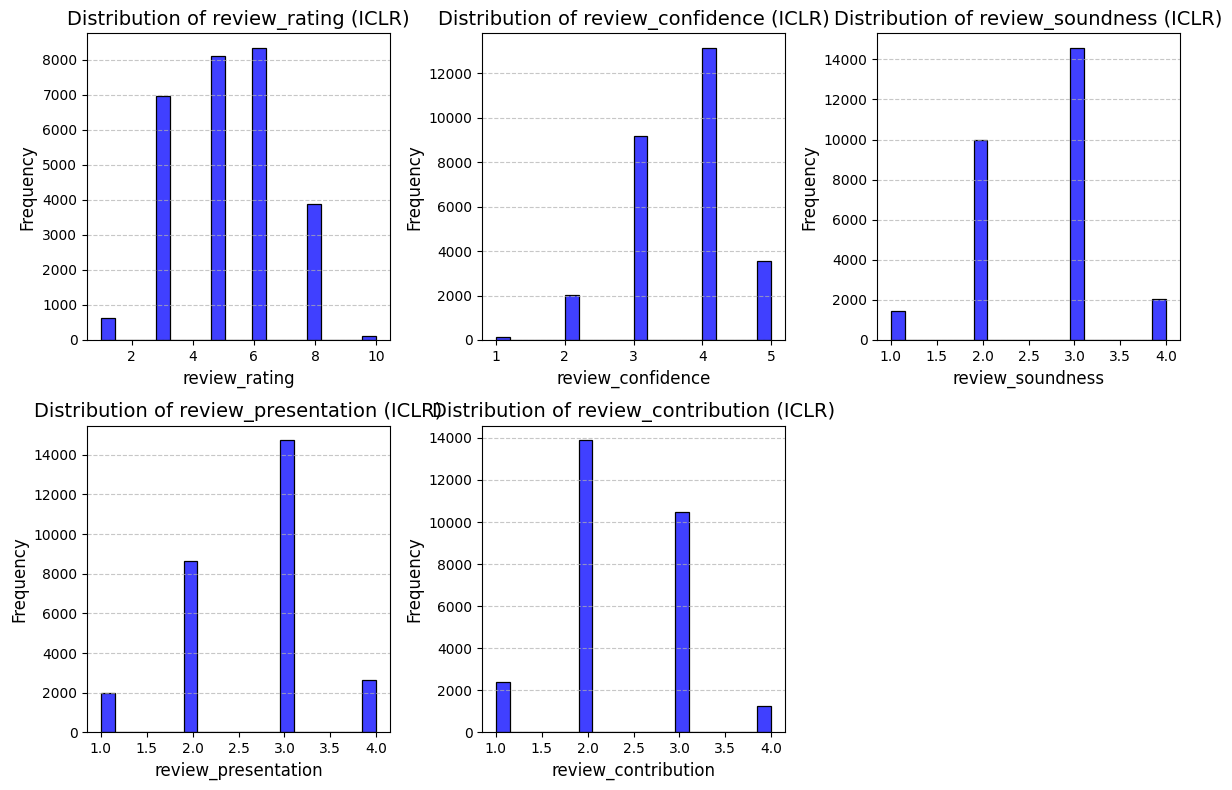

Descriptive Statistics for Review-Related Features (NeurIPS):
       review_rating  review_confidence  review_soundness  \
count       15175.00           15175.00          15175.00   
mean            5.90               3.54              2.98   
std             1.19               0.87              0.62   
min             1.00               1.00              1.00   
25%             5.00               3.00              3.00   
50%             6.00               4.00              3.00   
75%             7.00               4.00              3.00   
max            10.00               5.00              4.00   

       review_presentation  review_contribution  
count             15175.00             15175.00  
mean                  2.92                 2.75  
std                   0.70                 0.64  
min                   1.00                 1.00  
25%                   3.00                 2.00  
50%                   3.00                 3.00  
75%                   3.00            

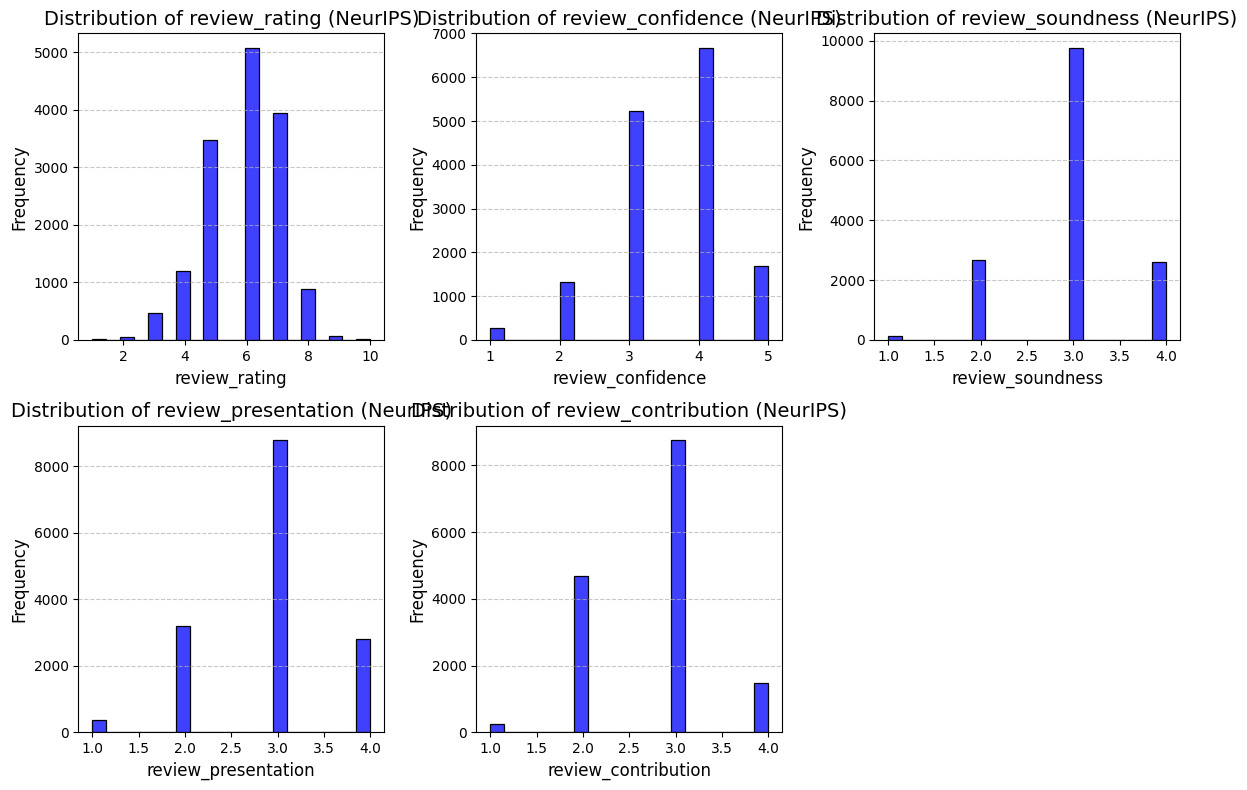

In [7]:
# List of dataframes and their corresponding titles
dataframes = [(df_iclr, 'ICLR'), (df_neurips, 'NeurIPS')]

for df, title in dataframes:
    # Select review-related features
    review_features = ['review_rating', 'review_confidence', 'review_soundness', 'review_presentation', 'review_contribution']
    
    # Calculate descriptive statistics
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    review_stats = numerical_columns[review_features].describe()
    print(f"Descriptive Statistics for Review-Related Features ({title}):")
    print(review_stats.round(2))
    
    # Visualize distributions of review-related features
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(review_features, 1):
        plt.subplot(2, 3, i)
        sns.histplot(numerical_columns[feature], bins=20, color='blue')
        plt.title(f"Distribution of {feature} ({title})", fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# 4. Submission-Level Analysis

Aggregated Metrics for ICLR:
   submission_number  avg_review_rating  var_review_rating  \
0                  1               5.25           0.250000   
1                  2               4.75           1.583333   
2                  3               4.25           2.250000   
3                  5               6.00           2.000000   
4                  9               6.50           1.000000   

   avg_review_confidence  var_review_confidence  avg_politeness_score  \
0                   3.75                   0.25              0.269500   
1                   3.75                   0.25              0.392125   
2                   4.25                   0.25              0.149500   
3                   3.25                   0.25              0.246775   
4                   3.75                   0.25              0.486275   

   avg_citation_count  avg_similarity_score  avg_sentiment_polarity  
0                2.25              0.910317                0.099397  
1                3.

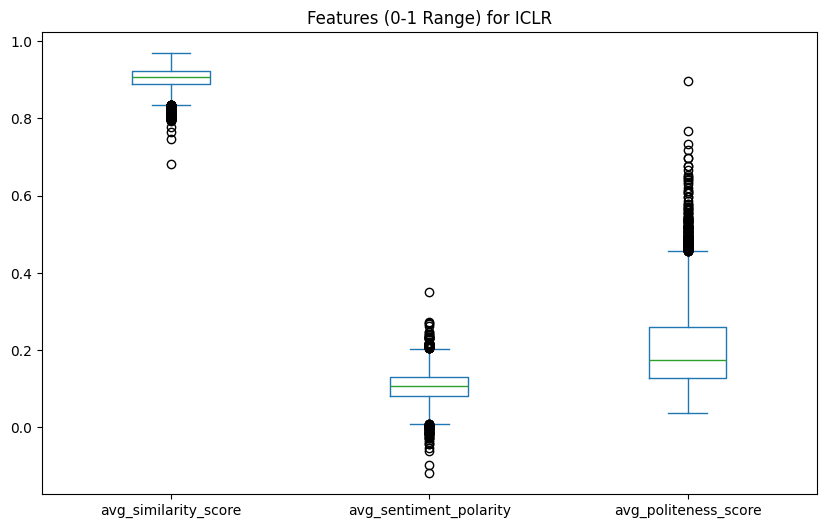

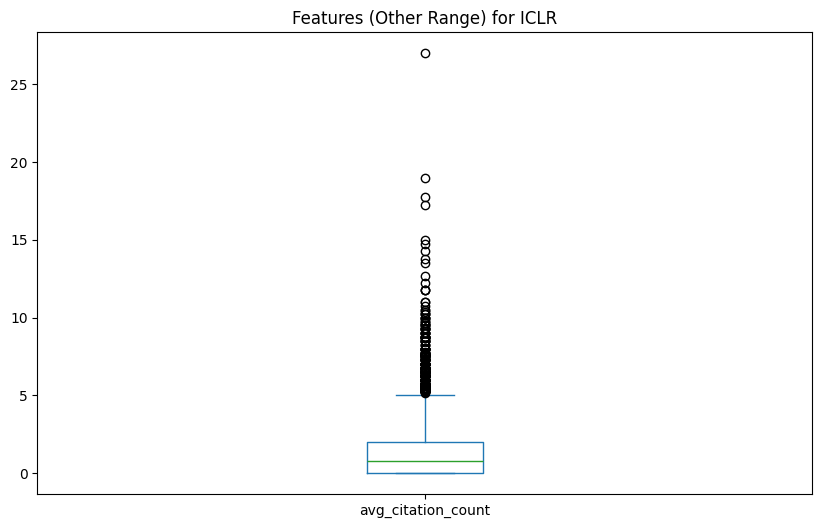

Aggregated Metrics for NeurIPS:
   submission_number  avg_review_rating  var_review_rating  \
0                  8           5.750000           3.583333   
1                 10           4.400000           3.800000   
2                 19           5.400000           1.300000   
3                 21           5.833333           0.966667   
4                 22           7.400000           0.800000   

   avg_review_confidence  var_review_confidence  avg_politeness_score  \
0               4.500000               0.333333              0.161200   
1               3.800000               0.200000              0.129560   
2               3.200000               0.200000              0.315900   
3               2.666667               1.866667              0.267517   
4               3.600000               0.300000              0.223220   

   avg_citation_count  avg_similarity_score  avg_sentiment_polarity  
0            1.500000              0.899710                0.120893  
1            1.8

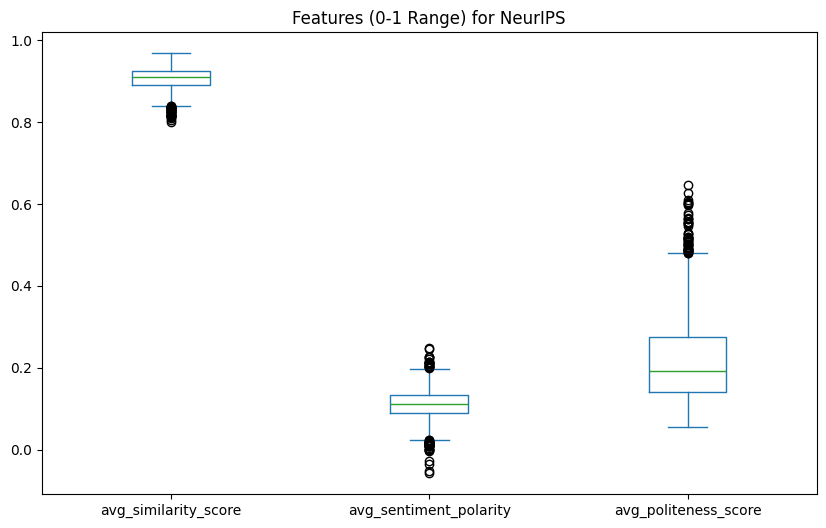

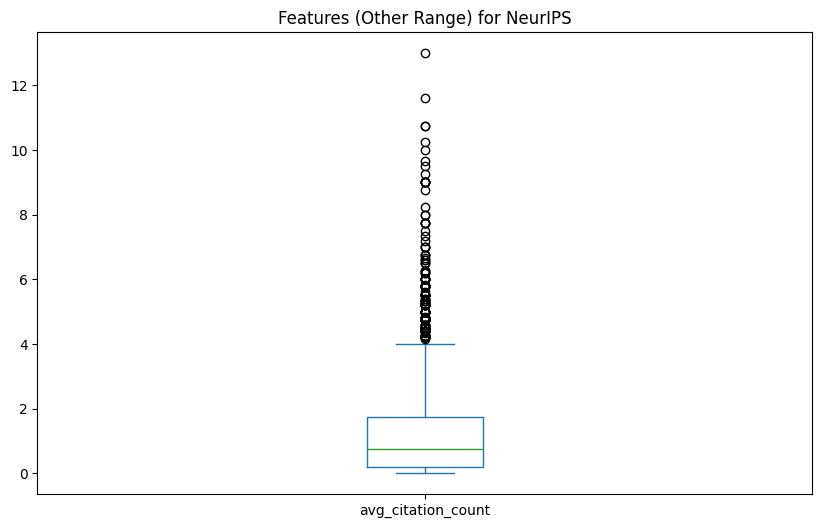

In [8]:
# Function to analyze aggregated metrics for a given dataframe
def analyze_reviews(df, title):
    # Group by submission_number and calculate aggregated metrics
    grouped = df.groupby('submission_number').agg({
        'review_rating': ['mean', 'var'],
        'review_confidence': ['mean', 'var'],
        'politeness_score': 'mean',
        'citation_count': 'mean',
        'similarity_score': 'mean',
        'sentiment_polarity': 'mean'
    })

    # Rename columns for better readability
    grouped.columns = [
        'avg_review_rating', 'var_review_rating',
        'avg_review_confidence', 'var_review_confidence',
        'avg_politeness_score', 'avg_citation_count',
        'avg_similarity_score', 'avg_sentiment_polarity'
    ]
    grouped.reset_index(inplace=True)

    # Display the aggregated metrics
    print(f"Aggregated Metrics for {title}:")
    print(grouped.head())

    # Separate features into two groups based on their value ranges
    features_0_1 = ['avg_similarity_score', 'avg_sentiment_polarity', 'avg_politeness_score']
    features_other = ['avg_citation_count']

    # Visualize features with values between 0 and 1
    grouped[features_0_1].plot(kind='box', figsize=(10, 6), title=f"Features (0-1 Range) for {title}")
    plt.show()

    # Visualize features with values outside the 0-1 range
    grouped[features_other].plot(kind='box', figsize=(10, 6), title=f"Features (Other Range) for {title}")
    plt.show()

# Analyze df_iclr
analyze_reviews(df_iclr, 'ICLR')

# Analyze df_neurips
analyze_reviews(df_neurips, 'NeurIPS')

# 5. Temporal Analysis

Average Submission to Review Days (ICLR): 52.63
Average Review Creation to Submission Days (ICLR): 12.99


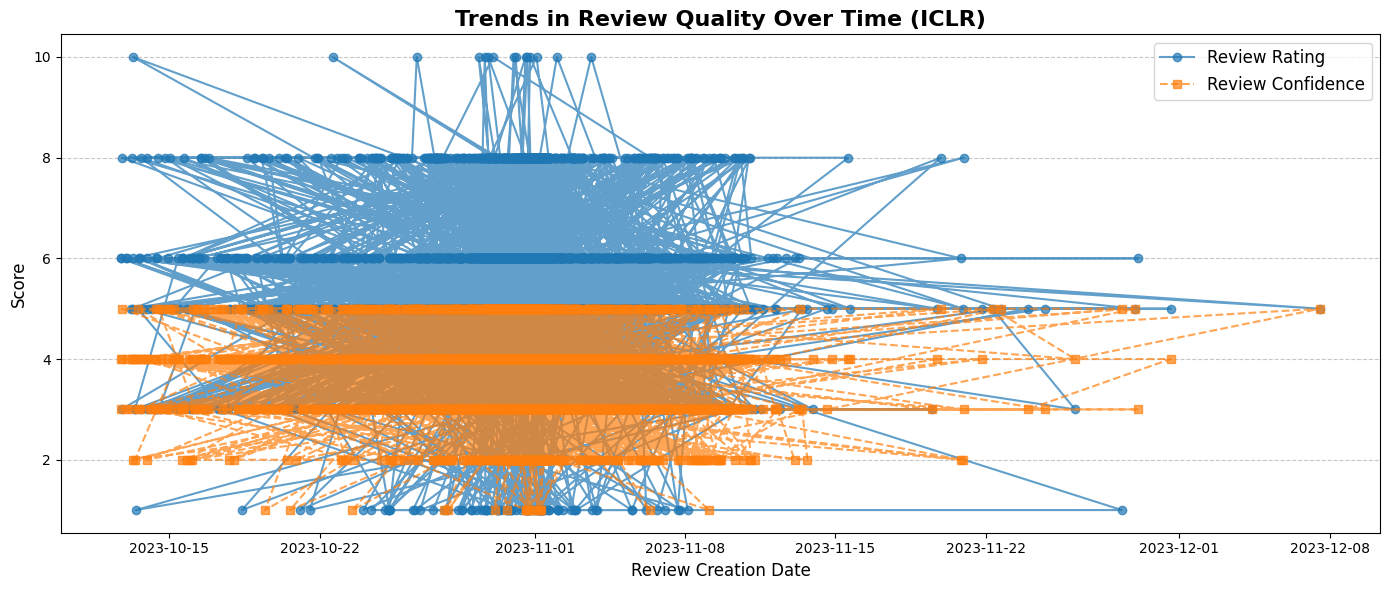

Average Submission to Review Days (NeurIPS): 217.76
Average Review Creation to Submission Days (NeurIPS): 158.67


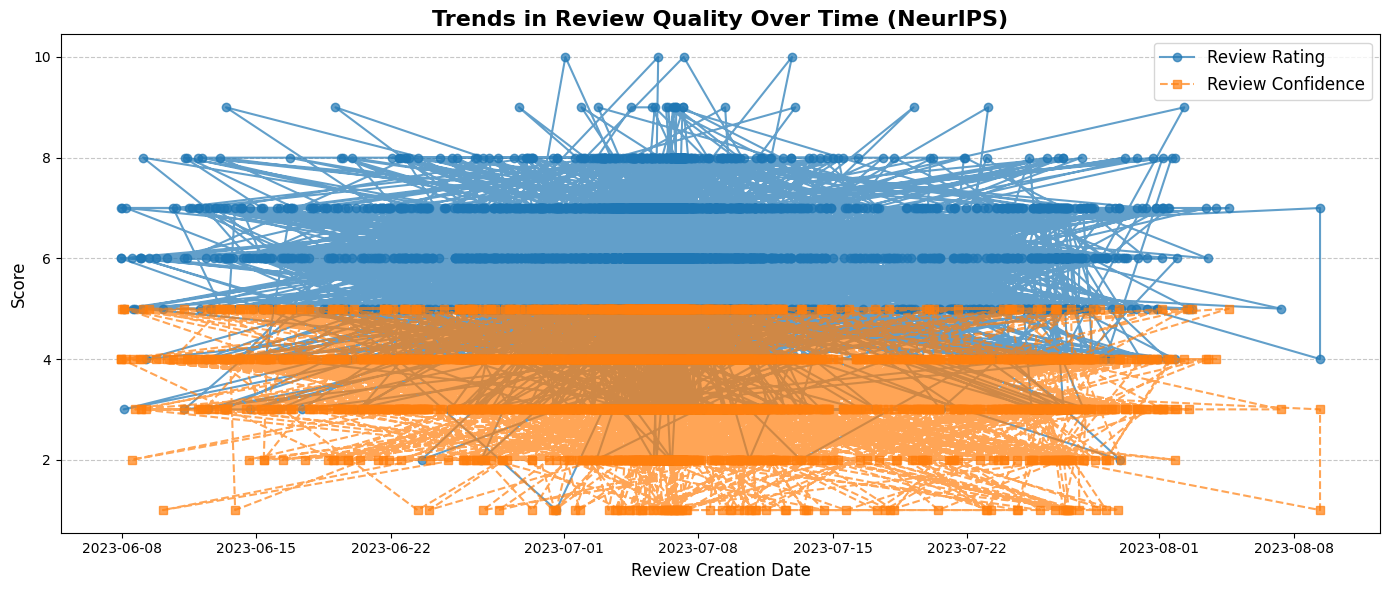

In [40]:
# Function to analyze temporal trends
def analyze_temporal_trends(df, title):
    # Convert timestamps to datetime for better readability
    df['submission_creation_date'] = pd.to_datetime(df['submission_creation_date'], unit='ms')
    df['creation_date'] = pd.to_datetime(df['creation_date'], unit='ms')
    df['last_modification_date'] = pd.to_datetime(df['last_modification_date'], unit='ms')

    # Calculate average review timelines
    avg_submission_to_review_days = df['paper_submission_to_review_submission_days'].mean()
    avg_review_creation_to_submission_days = df['review_creation_to_review_submission_days'].mean()
    print(f"Average Submission to Review Days ({title}): {avg_submission_to_review_days:.2f}")
    print(f"Average Review Creation to Submission Days ({title}): {avg_review_creation_to_submission_days:.2f}")

    # Plot trends in review quality over time
    plt.figure(figsize=(14, 6))
    plt.plot(df['creation_date'], df['review_rating'], label='Review Rating', marker='o', linestyle='-', alpha=0.7)
    plt.plot(df['creation_date'], df['review_confidence'], label='Review Confidence', marker='s', linestyle='--', alpha=0.7)
    plt.title(f"Trends in Review Quality Over Time ({title})", fontsize=16, fontweight='bold')
    plt.xlabel("Review Creation Date", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Analyze temporal trends for df_iclr
analyze_temporal_trends(df_iclr, 'ICLR')

# Analyze temporal trends for df_neurips
analyze_temporal_trends(df_neurips, 'NeurIPS')

# Paper: Review Dataset Statistics

* Number of Papers
* Number of Reviews in total 
* #review per paper on average 
* Number of non-anonymous Reviewers
* Review Length min/mean/ std /max 
* Time Taken to Submit Reviews (days)

Table with all the stats

Plot 1 : review length 

Time to submit review 

In [9]:
# Count unique paper IDs in each dataframe
unique_papers_iclr = df_iclr['submission_id'].nunique()
unique_papers_neurips = df_neurips['submission_id'].nunique()

print(f"Number of unique papers in df_iclr: {unique_papers_iclr}")
print(f"Number of unique papers in df_neurips: {unique_papers_neurips}")

Number of unique papers in df_iclr: 7262
Number of unique papers in df_neurips: 3395


In [10]:
# Count the number of rows (total reviews) in each dataframe
total_reviews_iclr = len(df_iclr)
total_reviews_neurips = len(df_neurips)

print(f"Total reviews in df_iclr: {total_reviews_iclr}")
print(f"Total reviews in df_neurips: {total_reviews_neurips}")

Total reviews in df_iclr: 28028
Total reviews in df_neurips: 15175


In [11]:
# Calculate average number of reviews per paper
avg_reviews_per_paper_iclr = total_reviews_iclr / unique_papers_iclr
avg_reviews_per_paper_neurips = total_reviews_neurips / unique_papers_neurips

print(f"Average number of reviews per paper in ICLR: {avg_reviews_per_paper_iclr:.2f}")
print(f"Average number of reviews per paper in NeurIPS: {avg_reviews_per_paper_neurips:.2f}")

Average number of reviews per paper in ICLR: 3.86
Average number of reviews per paper in NeurIPS: 4.47


In [12]:
# Calculate and print statistics for df_iclr
iclr_stats = df_iclr['length_words'].agg(['min', 'max', 'mean', 'std'])
print("Review Length Statistics for ICLR:")
print(iclr_stats)

# Calculate and print statistics for df_neurips
neurips_stats = df_neurips['length_words'].agg(['min', 'max', 'mean', 'std'])
print("\nReview Length Statistics for NeurIPS:")
print(neurips_stats)

Review Length Statistics for ICLR:
min        4.000000
max     3177.000000
mean     424.502462
std      236.506597
Name: length_words, dtype: float64

Review Length Statistics for NeurIPS:
min        5.000000
max     3374.000000
mean     439.366063
std      242.664414
Name: length_words, dtype: float64


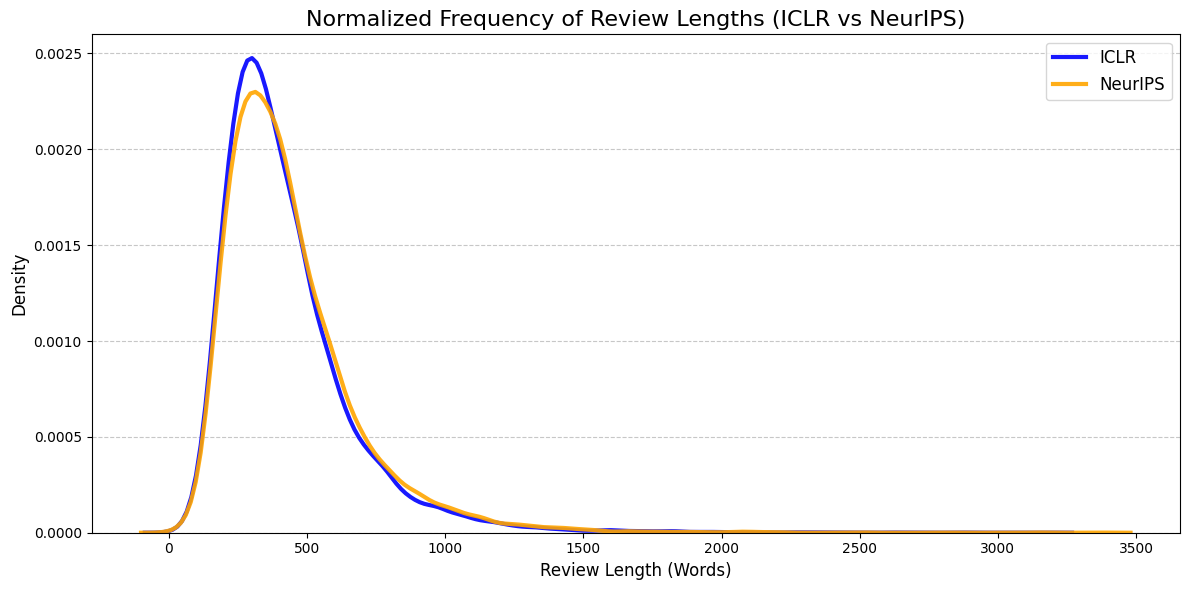

In [13]:
# Plot normalized frequency of review lengths for both conferences
plt.figure(figsize=(12, 6))
sns.kdeplot(df_iclr['length_words'], label='ICLR', color='blue', fill=False, alpha=0.9, linewidth=3)
sns.kdeplot(df_neurips['length_words'], label='NeurIPS', color='orange', fill=False, alpha=0.9, linewidth=3)
plt.title('Normalized Frequency of Review Lengths (ICLR vs NeurIPS)', fontsize=16)
plt.xlabel('Review Length (Words)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# Calculate averages for ICLR
avg_citation_count_iclr = df_iclr['citation_count'].mean()
avg_question_count_iclr = df_iclr['question_count'].mean()

# Calculate averages for NeurIPS
avg_citation_count_neurips = df_neurips['citation_count'].mean()
avg_question_count_neurips = df_neurips['question_count'].mean()

# Print the results
print(f"Average Citation Count (ICLR): {avg_citation_count_iclr:.2f}")
print(f"Average Question Count (ICLR): {avg_question_count_iclr:.2f}")
print(f"Average Citation Count (NeurIPS): {avg_citation_count_neurips:.2f}")
print(f"Average Question Count (NeurIPS): {avg_question_count_neurips:.2f}")

Average Citation Count (ICLR): 1.42
Average Question Count (ICLR): 4.02
Average Citation Count (NeurIPS): 1.25
Average Question Count (NeurIPS): 3.76


In [15]:
# Define the columns of interest
columns_of_interest = ['mattr', 'sentiment_polarity', 'similarity_score', 'politeness_score', ]

# Convert columns to numeric, coercing errors to NaN
df_iclr[columns_of_interest] = df_iclr[columns_of_interest].apply(pd.to_numeric, errors='coerce')
df_neurips[columns_of_interest] = df_neurips[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Calculate mean and std for ICLR
iclr_stats = df_iclr[columns_of_interest].agg(['mean', 'std'])
print("ICLR Statistics (Mean and Std):")
print(iclr_stats)

# Calculate mean and std for NeurIPS
neurips_stats = df_neurips[columns_of_interest].agg(['mean', 'std'])
print("\nNeurIPS Statistics (Mean and Std):")
print(neurips_stats)

ICLR Statistics (Mean and Std):
         mattr  sentiment_polarity  similarity_score  politeness_score
mean  0.778169            0.106639          0.903166          0.204089
std   0.035367            0.065788          0.041372          0.189514

NeurIPS Statistics (Mean and Std):
         mattr  sentiment_polarity  similarity_score  politeness_score
mean  0.776241            0.110290          0.906674          0.215150
std   0.034450            0.064071          0.039288          0.197571


In [16]:
# Define the columns of interest
columns_of_interest = ['hedge_C', 'hedge_D', 'hedge_E', 'hedge_I', 'hedge_N']

# Convert columns to numeric, coercing errors to NaN
df_iclr[columns_of_interest] = df_iclr[columns_of_interest].apply(pd.to_numeric, errors='coerce')
df_neurips[columns_of_interest] = df_neurips[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Calculate mean and std for ICLR
iclr_stats = df_iclr[columns_of_interest].agg(['mean', 'std'])
print("ICLR Statistics (Mean and Std):")
print(iclr_stats)

# Calculate mean and std for NeurIPS
neurips_stats = df_neurips[columns_of_interest].agg(['mean', 'std'])
print("\nNeurIPS Statistics (Mean and Std):")
print(neurips_stats)

ICLR Statistics (Mean and Std):
        hedge_C   hedge_D   hedge_E   hedge_I   hedge_N
mean  89.809048  0.101720  0.287427  0.066041  0.048630
std    9.365003  0.339111  0.645734  0.299901  0.275983

NeurIPS Statistics (Mean and Std):
        hedge_C   hedge_D   hedge_E   hedge_I   hedge_N
mean  90.189259  0.105107  0.252257  0.059638  0.052916
std    9.700777  0.350991  0.592802  0.285983  0.288448


In [17]:
# Define the columns of interest
columns_of_interest = ['review_rating', 'review_confidence', 'review_soundness', 'review_presentation', 'review_contribution']

# Calculate mean and std for df_neurips
neurips_stats = df_neurips[columns_of_interest].agg(['mean', 'std', 'min', 'max'])
print("\nNeurIPS Statistics (Mean and Std):")
print(neurips_stats)

# Calculate mean and std for df_iclr
iclr_stats = df_iclr[columns_of_interest].agg(['mean', 'std', 'min', 'max'])
print("ICLR Statistics (Mean and Std):")
print(iclr_stats)


NeurIPS Statistics (Mean and Std):
      review_rating  review_confidence  review_soundness  review_presentation  \
mean       5.895157           3.539044          2.976013             2.923558   
std        1.193878           0.866866          0.620339             0.701696   
min        1.000000           1.000000          1.000000             1.000000   
max       10.000000           5.000000          4.000000             4.000000   

      review_contribution  
mean             2.752883  
std              0.643801  
min              1.000000  
max              4.000000  
ICLR Statistics (Mean and Std):
      review_rating  review_confidence  review_soundness  review_presentation  \
mean       5.145747           3.641715          2.614885             2.643143   
std        1.722286           0.809065          0.696470             0.749941   
min        1.000000           1.000000          1.000000             1.000000   
max       10.000000           5.000000          4.000000      

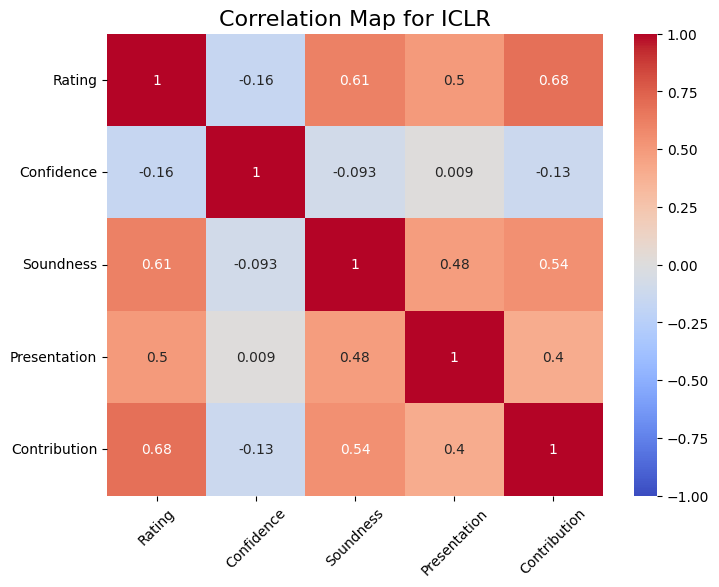

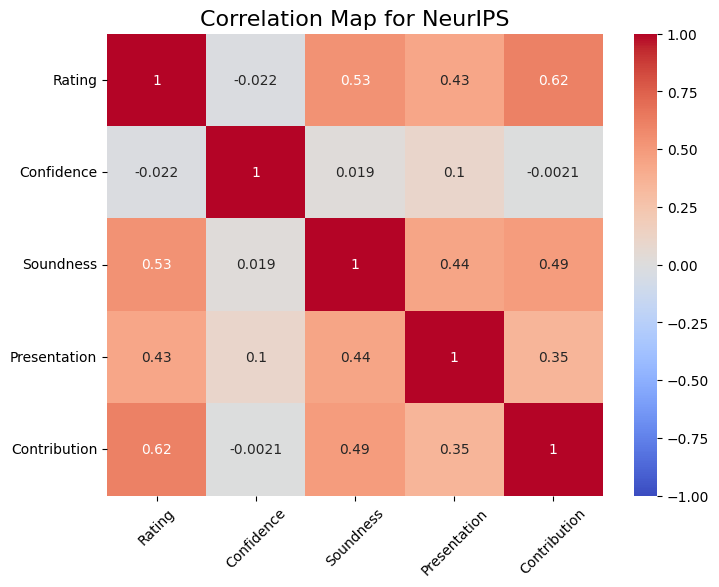

In [18]:
# Function to plot correlation map for specific columns with a black border on all sides
def plot_selected_correlation_map(df, columns, title):
    # Create a mapping for renaming columns in the figure
    renamed_columns = {
        'review_rating': 'Rating',
        'review_confidence': 'Confidence',
        'review_soundness': 'Soundness',
        'review_presentation': 'Presentation',
        'review_contribution': 'Contribution'
    }
    
    # Rename columns for the correlation matrix
    correlation_matrix = df[columns].rename(columns=renamed_columns).corr()
    
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10, rotation=0)
    
    # Add black border to all four sides
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)
    
    plt.show()

# Plot correlation map for df_iclr
plot_selected_correlation_map(df_iclr, columns_of_interest, 'Correlation Map for ICLR')

# Plot correlation map for df_neurips
plot_selected_correlation_map(df_neurips, columns_of_interest, 'Correlation Map for NeurIPS')

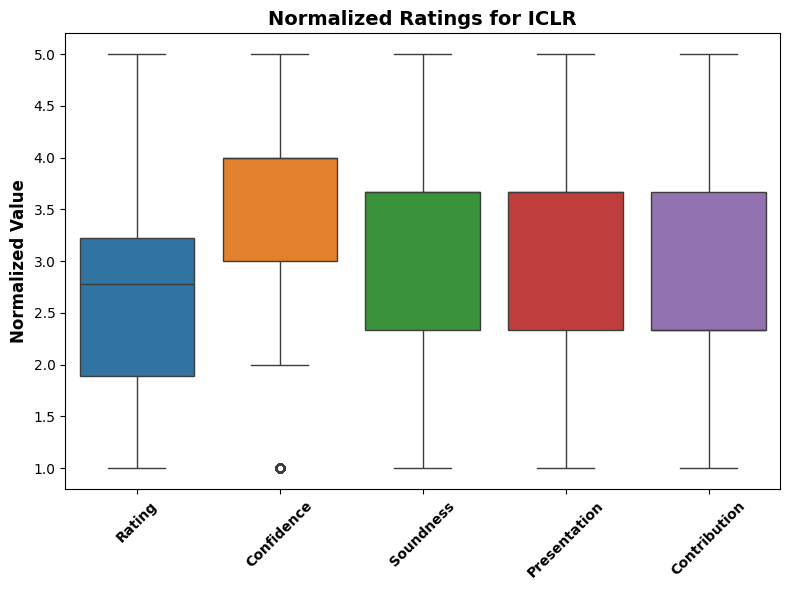

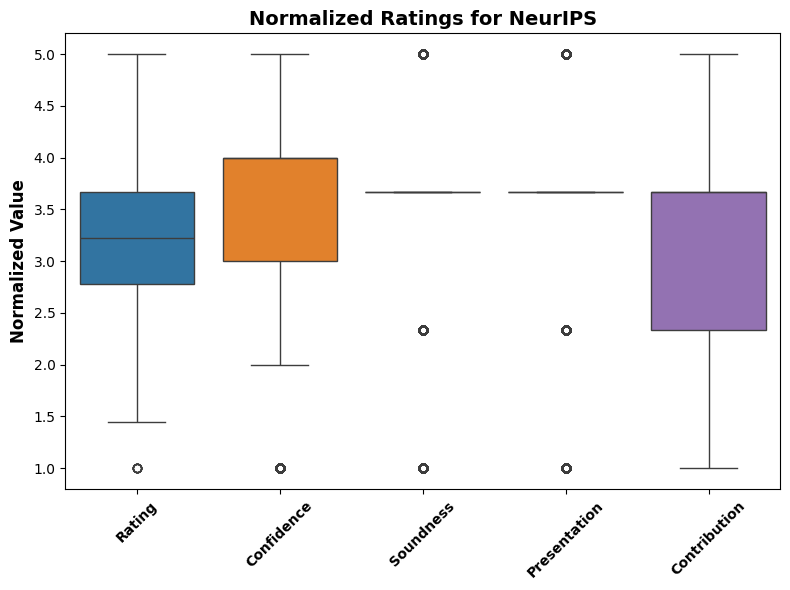

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_of_interest = ['review_rating', 'review_confidence', 'review_soundness', 'review_presentation', 'review_contribution']
# Normalize the columns for each conference
for df in [df_iclr, df_neurips]:
    for col in columns_of_interest:
        df[f"{col}_normalized"] = 1 + 4 * (df[col] - df[col].min()) / (df[col].max() - df[col].min())


# Separate figures for each conference
# Plot for ICLR
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_iclr[[f"{col}_normalized" for col in columns_of_interest]])
plt.title("Normalized Ratings for ICLR", fontsize=14, fontweight='bold')
plt.xticks(
    ticks=range(len(columns_of_interest)),
    labels=[col.replace('review_', '').capitalize() for col in columns_of_interest],
    rotation=45,
    fontsize=10,
    fontweight='bold'
)
plt.ylabel("Normalized Value", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Plot for NeurIPS
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_neurips[[f"{col}_normalized" for col in columns_of_interest]])
plt.title("Normalized Ratings for NeurIPS", fontsize=14, fontweight='bold')
plt.xticks(
    ticks=range(len(columns_of_interest)),
    labels=[col.replace('review_', '').capitalize() for col in columns_of_interest],
    rotation=45,
    fontsize=10,
    fontweight='bold'
)
plt.ylabel("Normalized Value", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

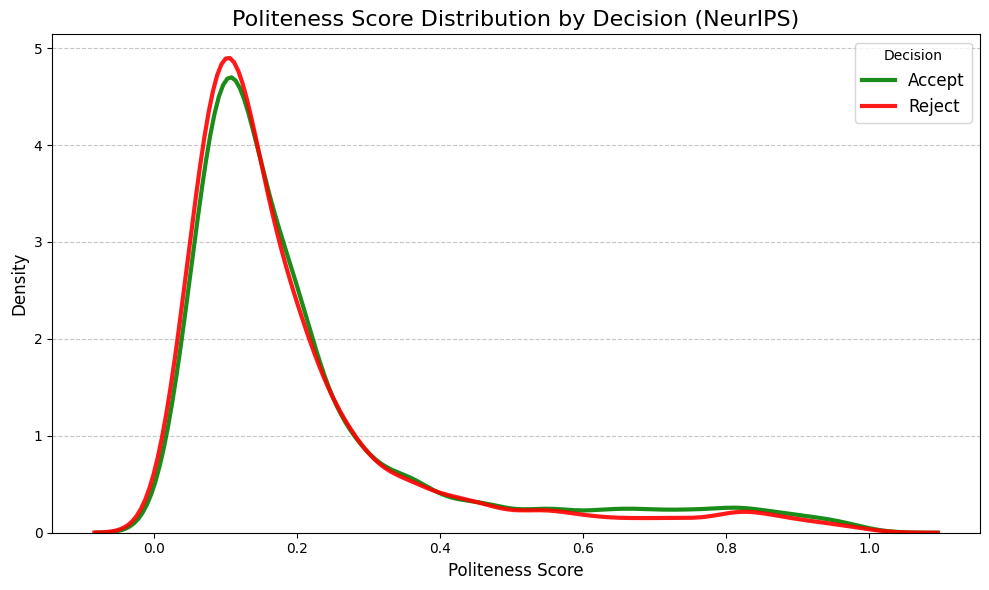

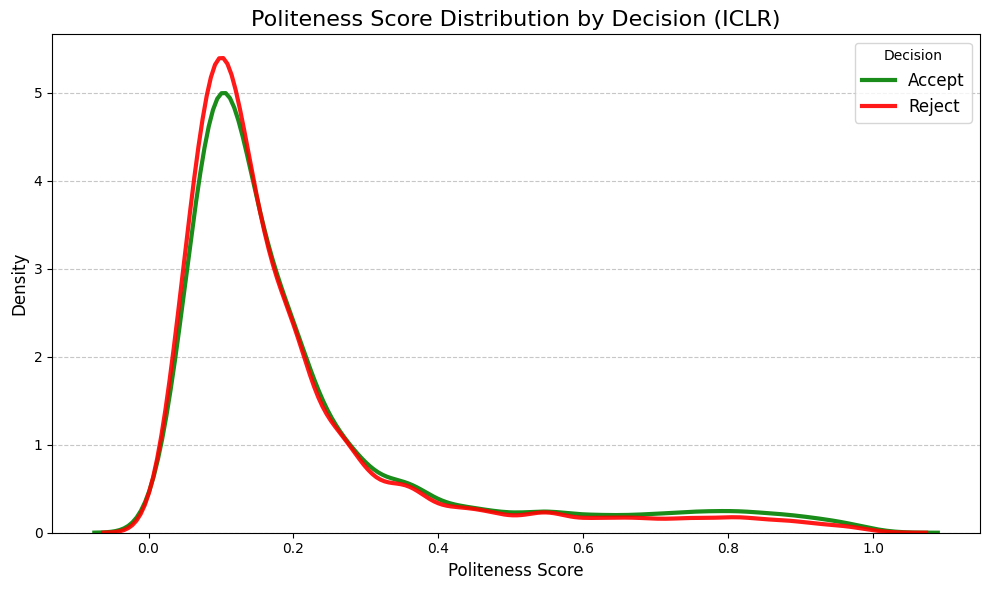

In [21]:
# color map for suggestions/decisions
color_map = {
    'Accept': 'green',
    'Reject': 'red'
}

# Define a function to plot politeness_score per decision distribution
def plot_politeness_distribution(df, title):
    # Add a decision column based on review_rating
    df['decision'] = df['review_rating'].apply(lambda x: 'Accept' if x >= 6 else 'Reject')
    
    # Plot politeness_score distribution
    plt.figure(figsize=(10, 6))
    for decision in df['decision'].unique():
        sns.kdeplot(
            data=df[df['decision'] == decision],
            x='politeness_score',
            label=decision,
            color=color_map.get(decision, 'black'),
            fill=False,
            alpha=0.9,
            linewidth=3
        )
    plt.title(f"Politeness Score Distribution by Decision ({title})", fontsize=16)
    plt.xlabel("Politeness Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="Decision", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot for df_neurips
plot_politeness_distribution(df_neurips, 'NeurIPS')

# Plot for df_iclr
plot_politeness_distribution(df_iclr, 'ICLR')

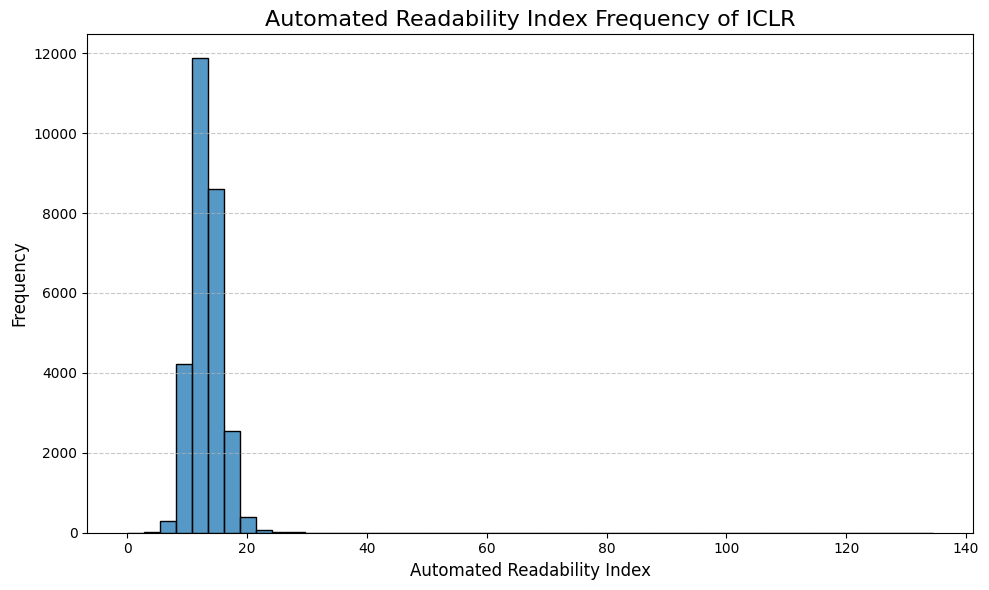

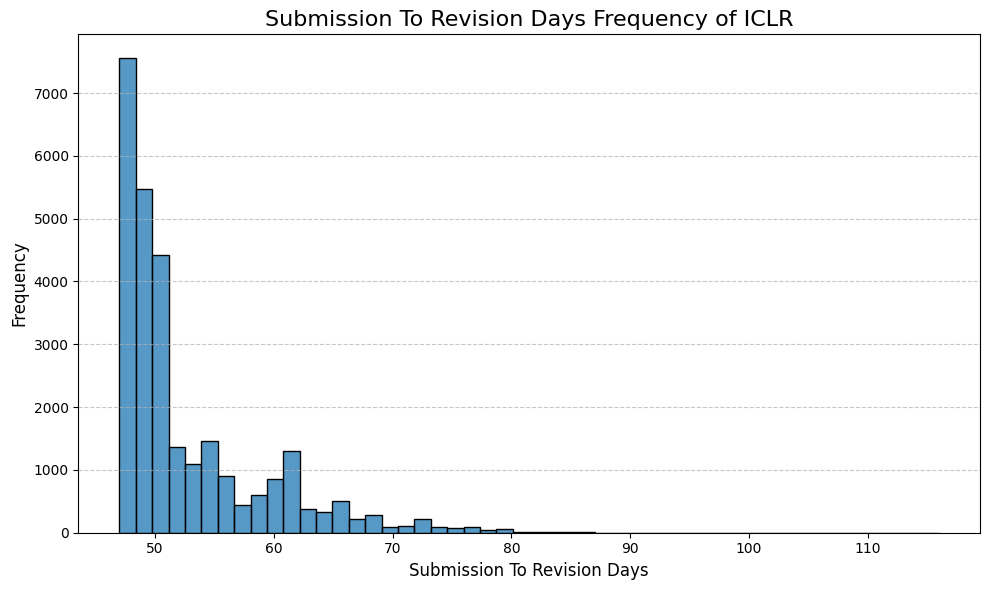

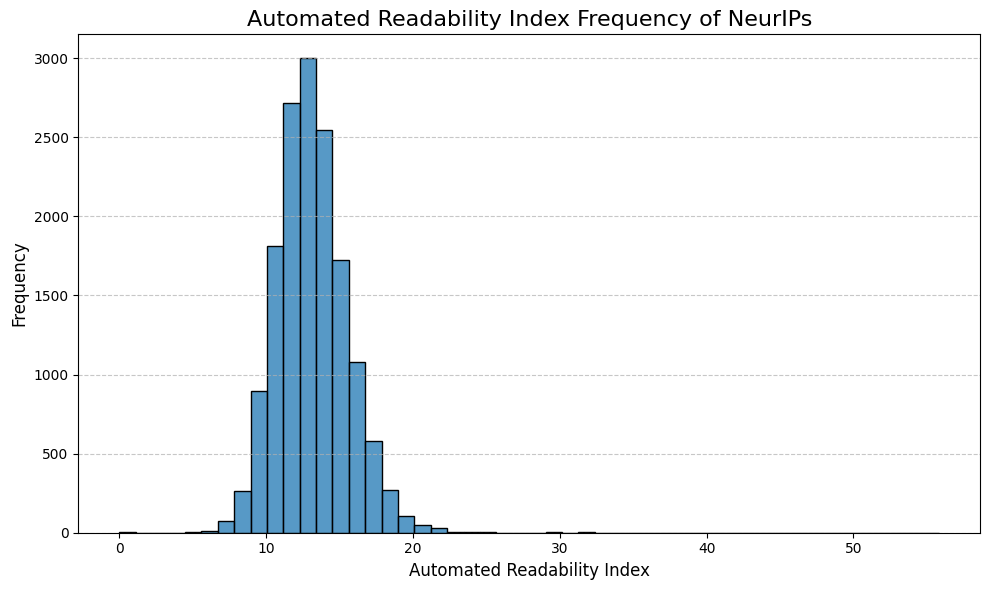

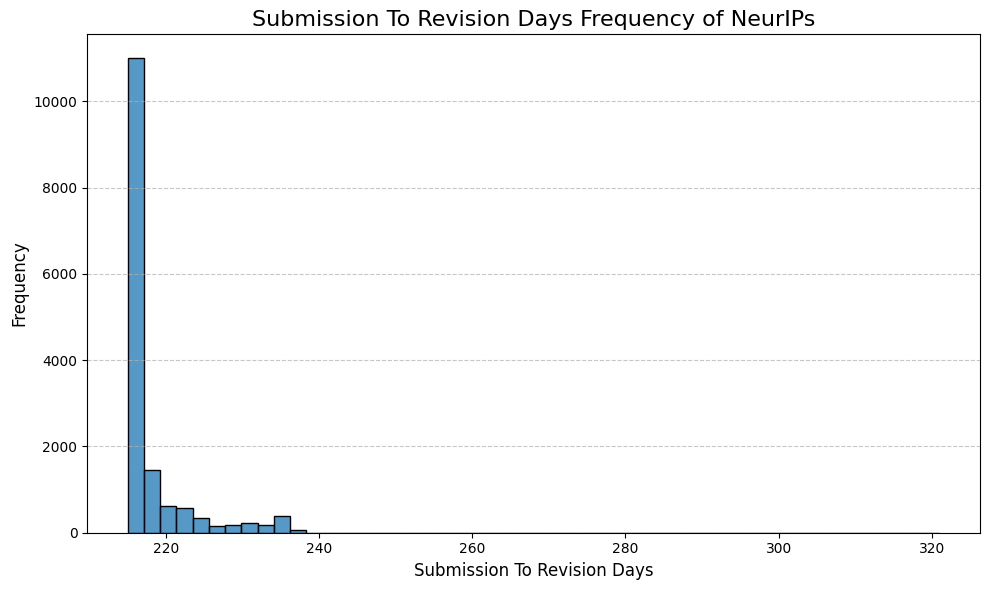

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_frequency(df, column, title, bins=50):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x=column,
        bins=bins,
        kde=False
    )
    plt.title(f"{column.replace('_', ' ').title()} Frequency of {title}",
              fontsize=16)
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

for df, label in [(df_iclr, 'ICLR'), (df_neurips, 'NeurIPs')]:
    for col in ['automated_readability_index', 'submission_to_revision_days']:
        plot_frequency(df, col, label)

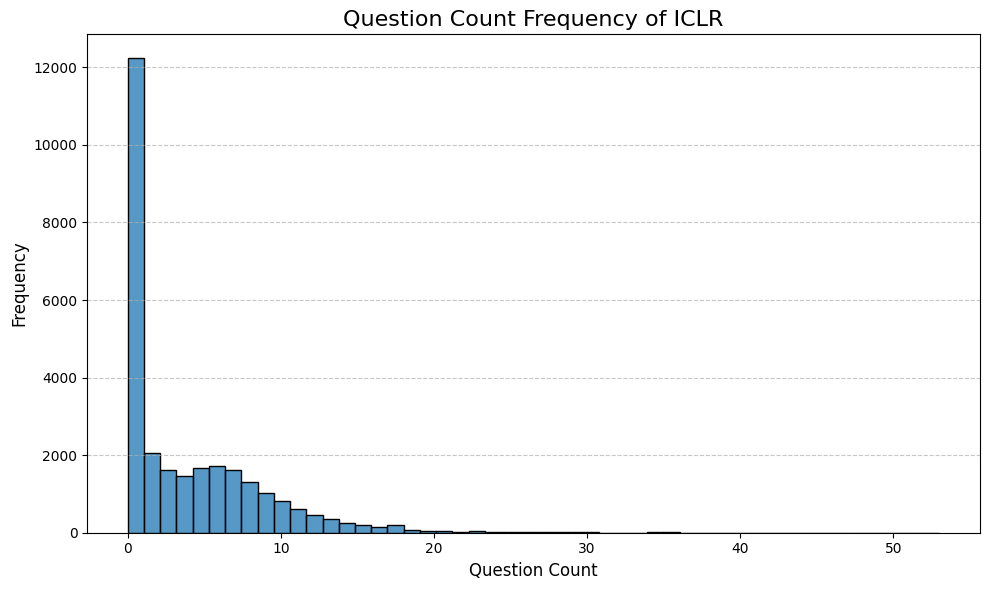

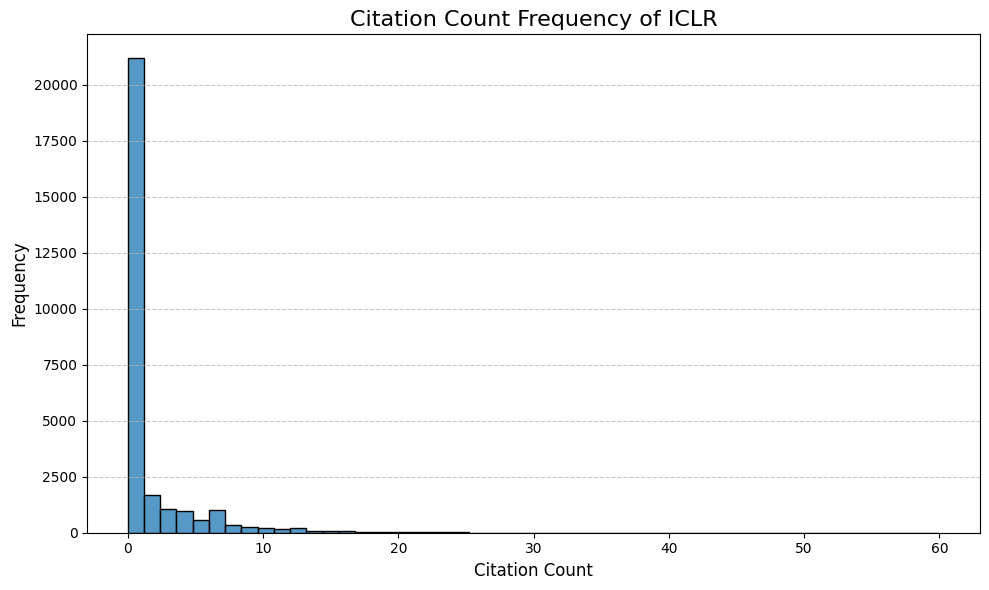

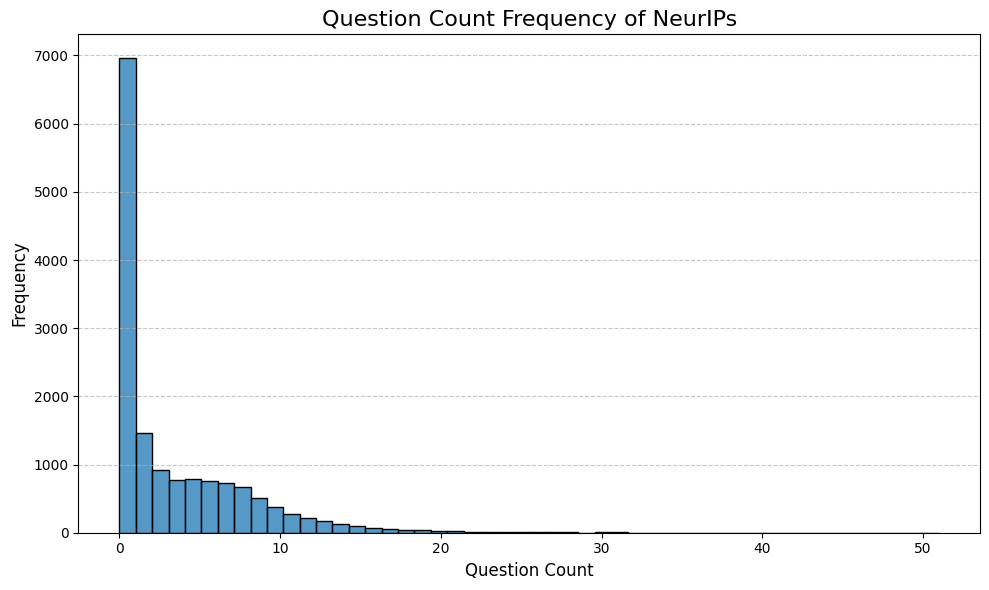

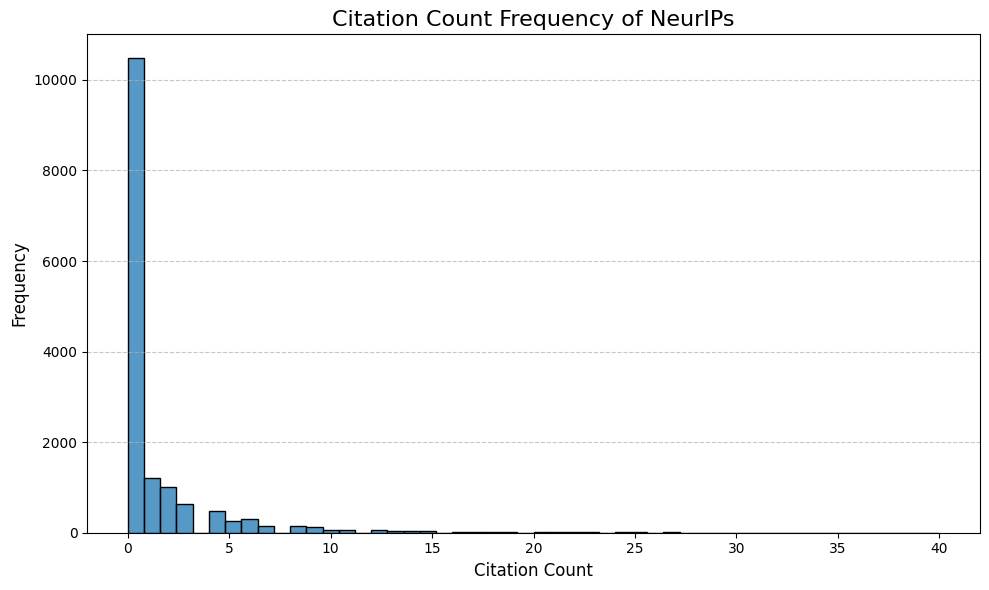

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_frequency(df, column, title, bins=50):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x=column,
        bins=bins,
        kde=False
    )
    plt.title(f"{column.replace('_', ' ').title()} Frequency of {title}",
              fontsize=16)
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


for df, label in [(df_iclr, 'ICLR'), (df_neurips, 'NeurIPs')]:
    for col in ['question_count', 'citation_count']:
        plot_frequency(df, col, label)

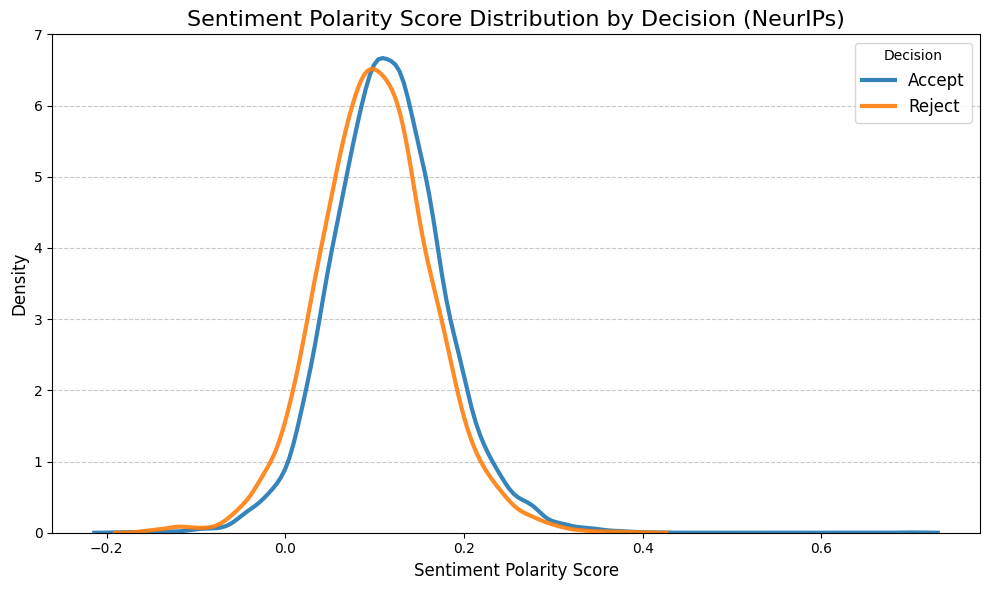

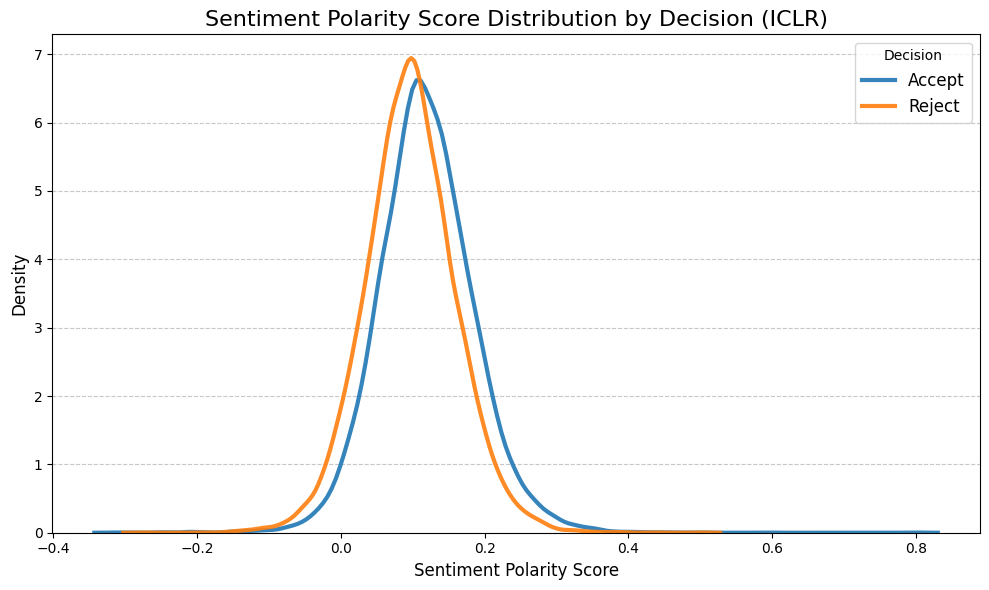

In [21]:
# Define a function to plot politeness_score per decision distribution
def plot_polarity_distribution(df, title):
    # Add a decision column based on review_rating
    df['decision'] = df['review_rating'].apply(lambda x: 'Accept' if x >= 6 else 'Reject')
    
    # Plot politeness_score distribution
    plt.figure(figsize=(10, 6))
    for decision in df['decision'].unique():
        sns.kdeplot(
            data=df[df['decision'] == decision],
            x='sentiment_polarity',
            label=decision,
            fill=False,
            alpha=0.9,
            linewidth=3
        )
    plt.title(f"Sentiment Polarity Score Distribution by Decision ({title})", fontsize=16)
    plt.xlabel("Sentiment Polarity Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="Decision", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot for df_neurips
plot_polarity_distribution(df_neurips, 'NeurIPs')

# Plot for df_iclr
plot_polarity_distribution(df_iclr, 'ICLR')